In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
probs = [
    [0.1, 0.02],
    [0.02, 0.1],
]
n1 = 50
n2 = 50
n = n1 + n2
G = nx.stochastic_block_model([n1, n2], probs, seed=0)

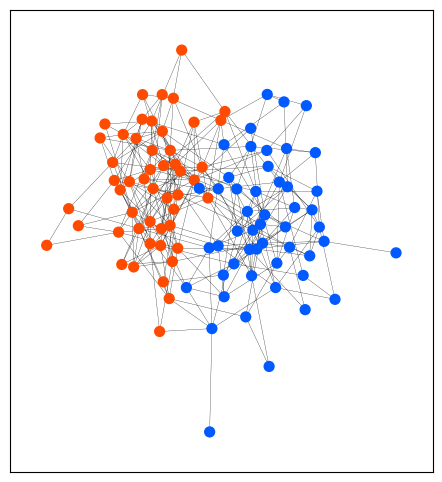

In [3]:
# グラフの図示
pos = nx.layout.spring_layout(G, seed=3)
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
c = []
for i in range(n):
    if i < n1:
        c.append("#ff4b00")
    else:
        c.append("#005aff")
nx.draw_networkx(
    G, pos, ax=ax, with_labels=False, width=0.2, node_size=50, node_color=c
)

In [4]:
W = nx.adjacency_matrix(G).todense()  # 隣接行列
D = np.diag(W.sum(1))  # 次数行列

In [5]:
# ===============================
# 固有値分解による次元削減（Spectral Embedding）
# 式 (2.38)：(W + D) の固有値・固有ベクトルを用いた埋め込み
# ===============================

# 隣接行列 W と次数行列 D を加えた行列に対して、固有値分解を行う
# np.linalg.eigh は対象が「対称行列（実対称行列）」である場合に使う
# - eigval：固有値ベクトル（小さい順に並んでいる）
# - eigvec：対応する固有ベクトル（列ベクトルが各固有ベクトル）
eigval, eigvec = np.linalg.eigh(W + D)

# 固有ベクトルの上位2次元（最後の2列）を取り出して、スケーリング
# - eigvec[:, -2:]：最も大きい2つの固有ベクトル（次元：n × 2）
# - eigval[-2], eigval[-1]：対応する固有値（スケーリング係数）
# - np.sqrt(...) によってスケーリング（直交変換＋拡大縮小）を適用
# - ブロードキャストのために [None, :] で行列の形を調整
npos = eigvec[:, -2:] * np.sqrt(np.array([eigval[-2], eigval[-1]])[None, :])

In [6]:
# ===============================
# 行列分解（Spectral Embedding）による2次元散布図の描画
# ===============================

# サブプロットの2つ目（右側）を作成
ax = fig.add_subplot(1, 2, 2)

# 各ノードの所属するコミュニティに応じて色を設定
# - ノード番号 0～n1-1：コミュニティ1 → 赤
# - ノード番号 n1～n-1：コミュニティ2 → 青
c = []
for i in range(n):
    if i < n1:
        c.append("#ff4b00")  # コミュニティ1（前半50ノード）：赤
    else:
        c.append("#005aff")  # コミュニティ2（後半50ノード）：青

# ノードの2次元座標（npos）を散布図として描画
# - x軸：固有ベクトルの2番目の成分（npos[:, 1]）
# - y軸：固有ベクトルの1番目の成分（npos[:, 0]）
# - c：上で設定した色（コミュニティごとに分類）
ax.scatter(npos[:, 1], npos[:, 0], c=c)

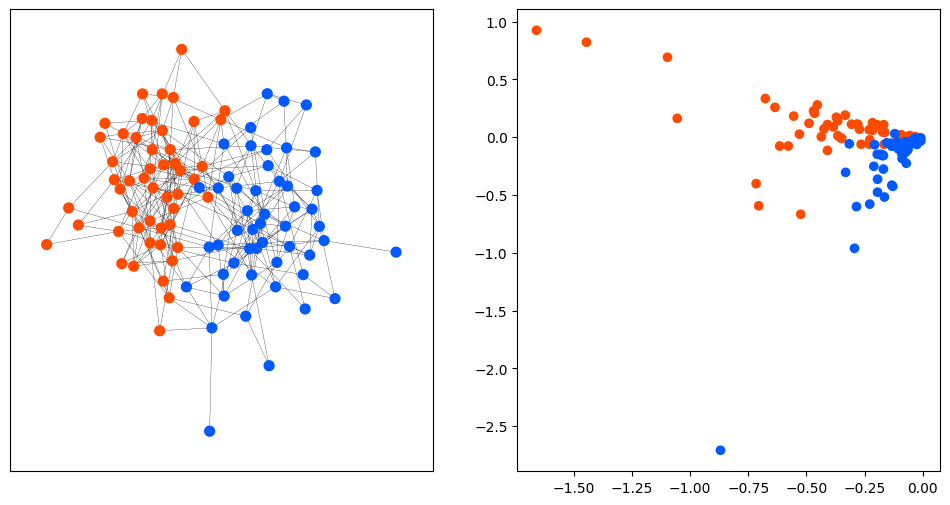

In [7]:
fig